# Projet EP
## 1 - Nettoyage des données

Affichage première ligne des données. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chemin vers le fichier Excel
file_path = '/Users/benjamincordebar/Desktop/2A/S8/EP/Projet/Copie de Dataset-M.xlsx'

# Chargement du fichier
try:
    data = pd.read_excel(file_path)
    print(data.head())  # Afficher les premières lignes pour inspecter les données
except Exception as e:
    print("Erreur lors du chargement du fichier:", e)


   Deg  Mo   GO  CO  CR   P1  PW       T3P  T1  Ready
0    0   1  0.0   0   0  0.0   0  111.3349  20      0
1    0   1  0.0   0   0  0.0   0  111.3349  20      0
2    0   1  0.0   0   0  0.0   0  111.3349  20      0
3    0   1  0.0   0   0  0.0   0  111.3349  20      0
4    0   1  0.0   0   0  0.0   0  111.3349  20      0


Affichage d'un résumé statistique des colonnes. 

In [15]:
print(data.describe())

                Deg            Mo            GO            CO            CR  \
count  90849.000000  90849.000000  90849.000000  90849.000000  90849.000000   
mean       0.601349      1.161378     21.210086     13.283096     18.277097   
std        0.489623      0.367881     26.841001    154.466628    154.813860   
min        0.000000      1.000000  -3276.800000 -32768.000000 -32768.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000     20.000000     14.000000     30.000000   
75%        1.000000      1.000000     40.800000     27.000000     34.000000   
max        1.000000      2.000000     83.800000     53.000000     50.000000   

                 P1            PW           T3P            T1         Ready  
count  90849.000000  90849.000000  9.084900e+04  90849.000000  90849.000000  
mean       0.282454     17.099792 -5.977561e+06     34.143612      0.542417  
std        1.568754    154.887774  1.274051e+09    154

Visualisation de la distribution des données. 

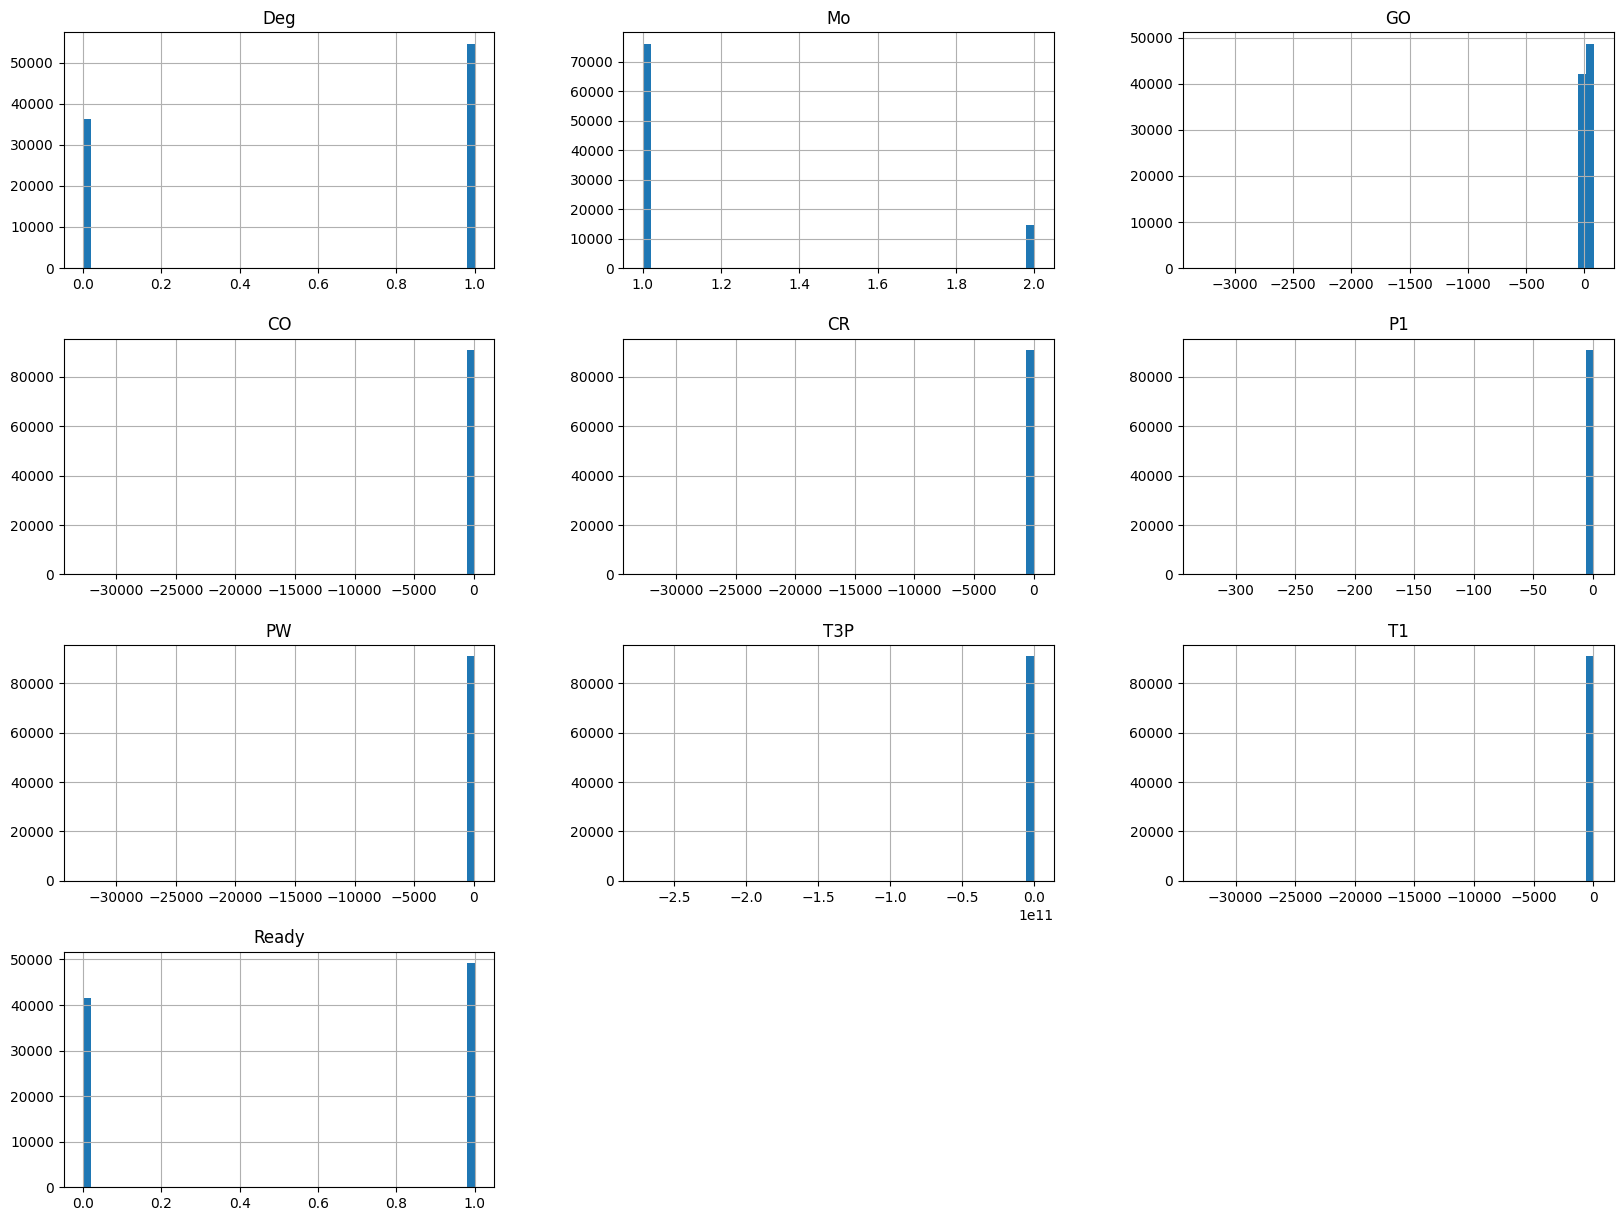

In [16]:
data.hist(bins=50, figsize=(20,15))    # width : 20 pouces, height : 15 pouces
plt.show()


# Affichage évolution des données dans le temps.

In [17]:
# Création d'une série temporelle en secondes
try:
    # Définir la date de départ
    start_date = '2024-01-01 00:00:00'
    
    # Créer la plage de dates en secondes
    data['Time'] = pd.date_range(start=start_date, periods=len(data), freq='s')
    
    # Définir cette colonne comme index
    data.set_index('Time', inplace=True)
    
    # Afficher les premières lignes pour vérifier
    print(data.head())
    
except Exception as e:
    print("Erreur:", e)

                     Deg  Mo   GO  CO  CR   P1  PW       T3P  T1  Ready
Time                                                                   
2024-01-01 00:00:00    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:01    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:02    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:03    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:04    0   1  0.0   0   0  0.0   0  111.3349  20      0


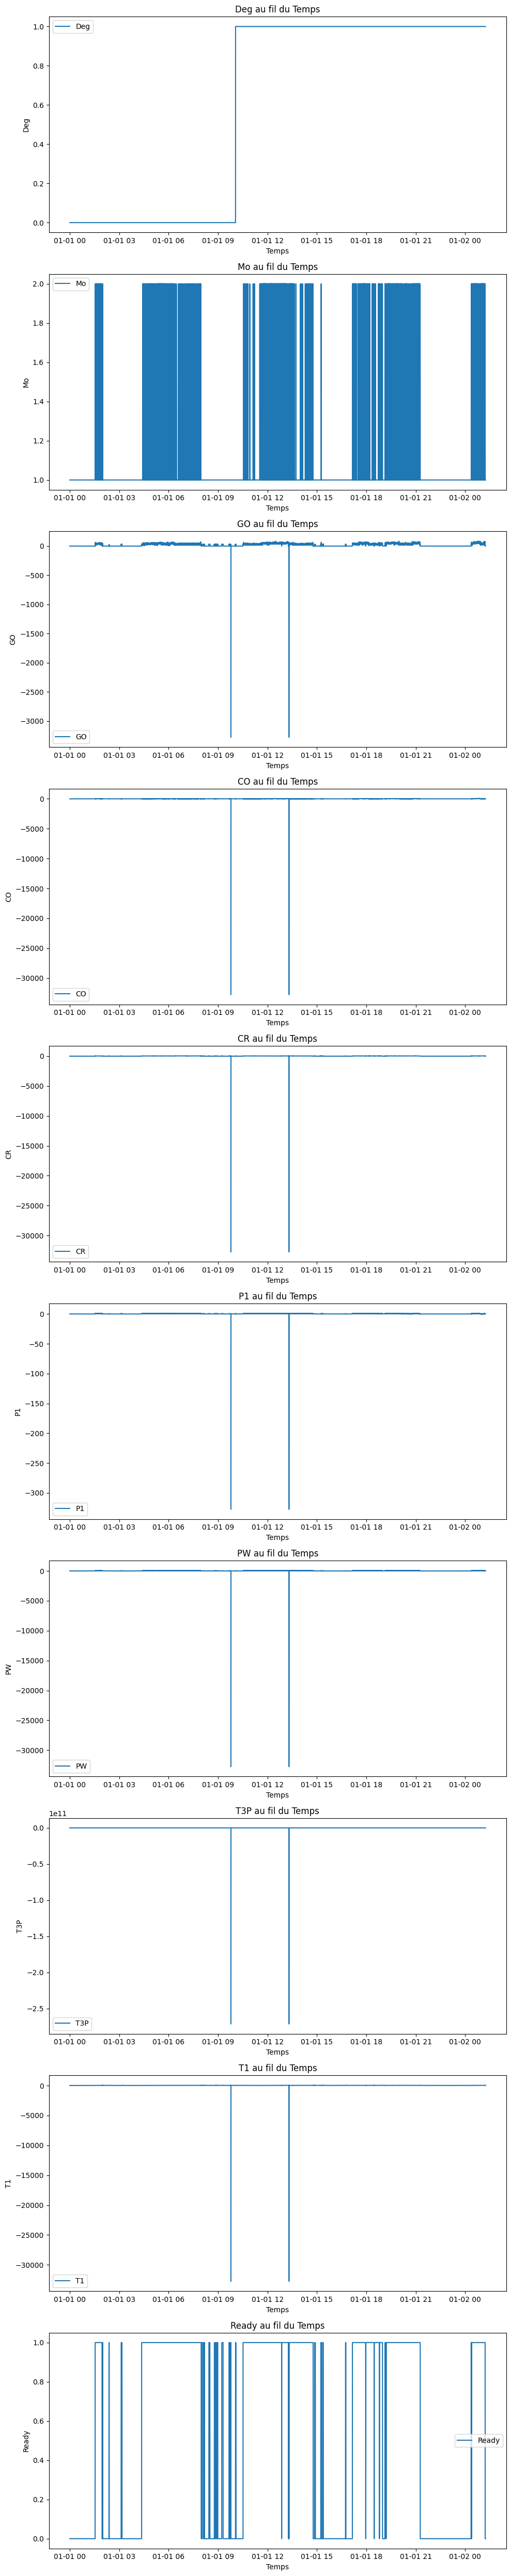

In [18]:
# Nombre de sous-graphiques
num_plots = len(data.columns)

# Créer une figure pour accueillir tous les plots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Boucler sur toutes les colonnes et tracer chacune
for i, column in enumerate(data.columns):
    axes[i].plot(data.index, data[column], label=column)
    axes[i].set_title(f'{column} au fil du Temps')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Temps')
    axes[i].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

# Élimination de données abérantes.

### Méthode des Écarts Interquartiles (IQR)

L'IQR mesure la dispersion statistique et est utilisée pour construire des boxplots. Les données points qui se situent en dehors de 1.5 (ici 10) fois l'IQR à partir du premier ou du troisième quartile sont généralement considérées comme aberrantes.

In [19]:
import pandas as pd

# Calcul de l'IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour définir les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR - 1
upper_bound = Q3 + 1.5 * IQR + 1

# Filtrer les données pour garder seulement les valeurs non aberrantes
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
print("taille d'origine:", data.shape)
print("taille filtrée:", filtered_data.shape)


taille d'origine: (90849, 10)
taille filtrée: (90849, 10)


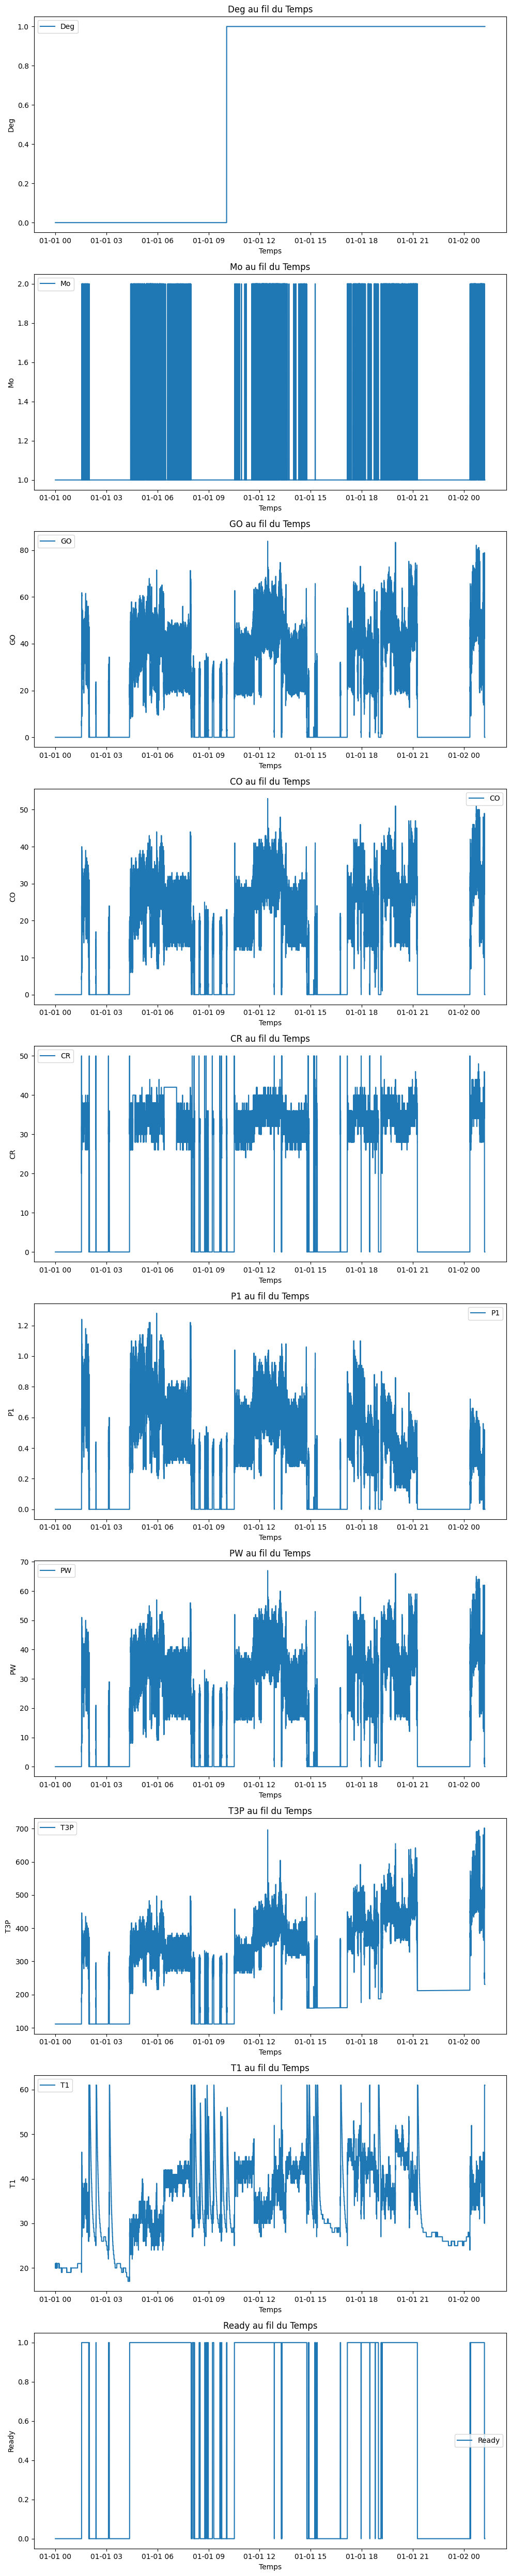

In [20]:
# Nombre de sous-graphiques
num_plots = len(filtered_data.columns)

# Créer une figure pour accueillir tous les plots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Boucler sur toutes les colonnes et tracer chacune
for i, column in enumerate(filtered_data.columns):
    axes[i].plot(filtered_data.index, filtered_data[column], label=column)
    axes[i].set_title(f'{column} au fil du Temps')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Temps')
    axes[i].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Problème : pour Mo cela ne marche pas car Mo prends la valeur 1 ou 2, il la méthode IQR enlève Mo=2.
Solution : rajouter -1 et +1 dans les limites. Cela n'est pas génant car les valeurs abérantes sont très éloignées des autres valeurs. 

### Autre Solution : Méthodes Basées sur la Densité

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : identifie  clusters de points de données denses et marquer ceux qui sont en dehors de ces clusters comme des outliers.

### Enlever les périodes d'arrêt

In [21]:
filtered_data2 = filtered_data[filtered_data['PW'] != 0]
print("Taille originale du DataFrame:", len(filtered_data))
print("Taille après filtration:", len(filtered_data2))

Taille originale du DataFrame: 90849
Taille après filtration: 50068


### Enlever 30 points après les temps d'arrêt.

In [22]:
# Ajout d'une colonne temporaire qui marque les redémarrages
filtered_data2['is_restart'] = (filtered_data2['PW'].shift(1) == 1) & (filtered_data2['PW'] > 1)

# Initialiser une liste pour garder les indices à exclure
indices_to_exclude = []

# Parcourir le DataFrame pour ajouter les indices de redémarrage et les 29 suivants
for index in filtered_data2[filtered_data2['is_restart']].index:
    # Créer un range de Timestamps à exclure
    end_time = index + pd.Timedelta(seconds=28)  # Ajout de 28 secondes à l'index de redémarrage pour obtenir 29 points de données au total
    indices_to_exclude.extend(pd.date_range(start=index, end=end_time, freq='s'))

# Assurer que les indices à exclure sont uniques et triés
indices_to_exclude = sorted(set(indices_to_exclude))

# Filtrer le DataFrame pour exclure les indices identifiés
filtered_data3 = filtered_data2.drop(indices_to_exclude, errors='ignore')  # Utiliser errors='ignore' pour éviter les erreurs si certains indices ne sont pas présents

# Enlever la colonne temporaire
filtered_data3.drop('is_restart', axis=1, inplace=True)

# Affichage des tailles pour vérification
print("Taille originale du DataFrame:", len(filtered_data2))
print("Taille après filtration:", len(filtered_data3))


Taille originale du DataFrame: 50068
Taille après filtration: 50028


/var/folders/jj/rn2bgqq11gjc0ccflxysbkk40000gn/T/ipykernel_12757/4211326012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['is_restart'] = (filtered_data2['PW'].shift(1) == 1) & (filtered_data2['PW'] > 1)


### Enlever les bruits : Filtrage de Bas Niveau (Low-Pass)

In [23]:
# from scipy.signal import butter, filtfilt

# def low_pass_filter(data, cutoff, fs, order=5):
#     # Définir les paramètres du filtre
#     nyq = 0.5 * fs  # Fréquence de Nyquist
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y

# # Paramètres du filtre
# cutoff = 0.1  # fréquence de coupure (le nombre de mesures par unité de temps)
# fs = 1        # fréquence d'échantillonnage

# # Application du filtre à chaque colonne numérique
# filtered_data4 = filtered_data3
# for column in filtered_data4.columns:
#     if filtered_data4[column].dtype in [np.float64, np.int64]:  # vérifiez que la colonne est numérique
#         filtered_data4[column + '_filtered'] = low_pass_filter(filtered_data4[column], cutoff, fs, order=5)

# # Affichage des tailles pour vérification
# print("Taille originale du DataFrame:", len(filtered_data3))
# print("Taille après filtration:", len(filtered_data4))

Cela ne change rien même quand je reduis la fréquence de coupure -> à revoir ou supp

### Sauvegarder les données dans un fichier xlsx.

In [24]:
# Sauvegarder le DataFrame filtré dans un fichier xlsx
filtered_data3.to_excel('/Users/benjamincordebar/Desktop/2A/S8/EP/Projet/data_cleaned/filtered_data.xlsx', index=False)


# 2 - Choisir un indicateur de performance (paramètre de sortie)

Pour cela, nous regardons les données nettoyées : 

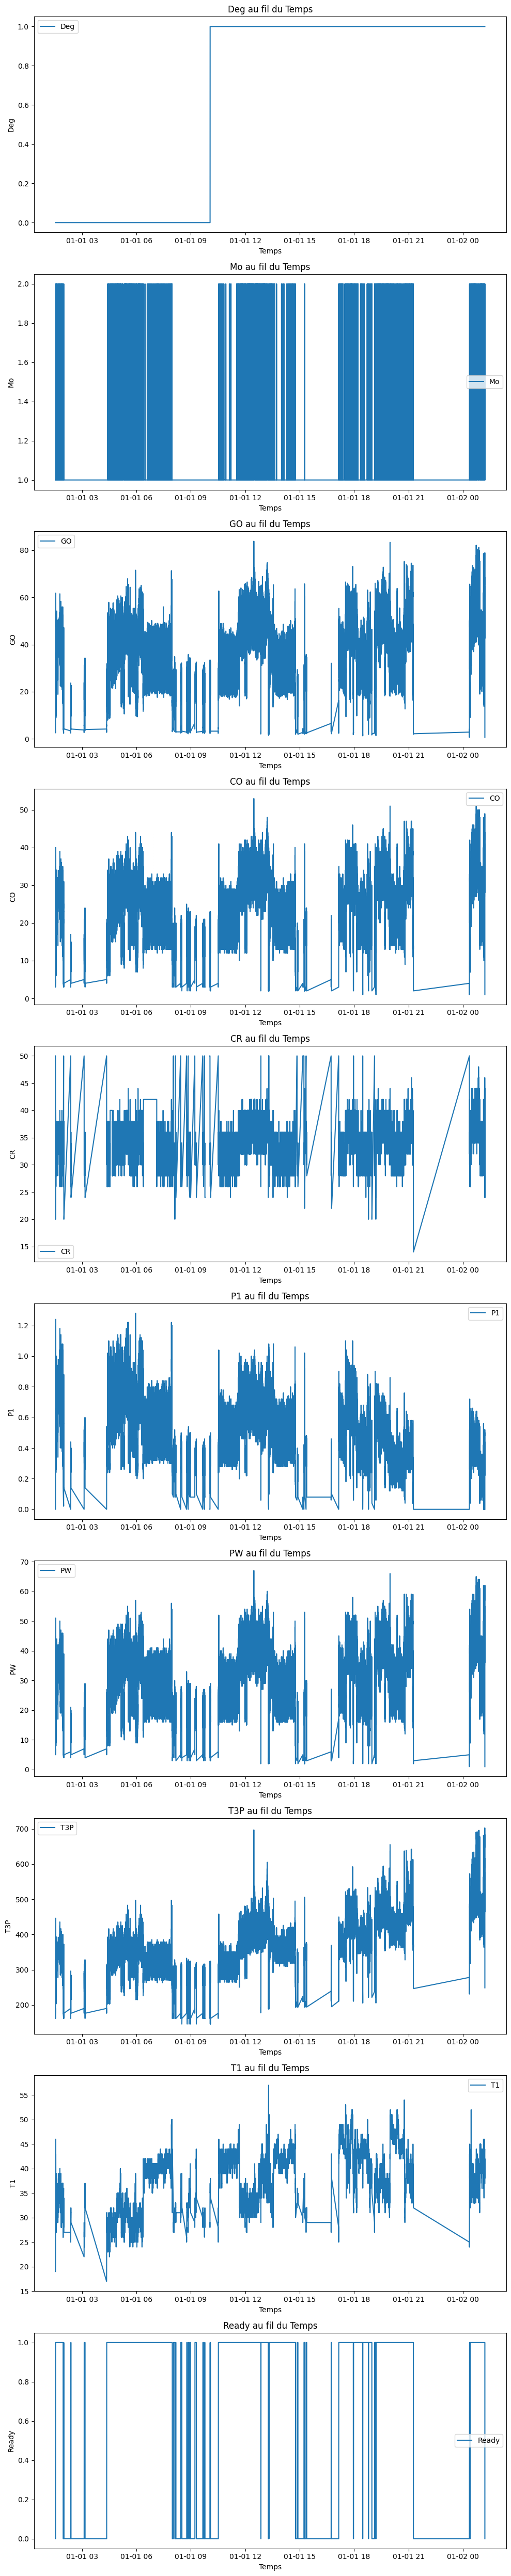

In [25]:
# Nombre de sous-graphiques
num_plots = len(filtered_data3.columns)

# Créer une figure pour accueillir tous les plots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Boucler sur toutes les colonnes et tracer chacune
for i, column in enumerate(filtered_data3.columns):
    axes[i].plot(filtered_data3.index, filtered_data3[column], label=column)
    axes[i].set_title(f'{column} au fil du Temps')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Temps')
    axes[i].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Nous pouvons constater : 
- La puissance du moteur (PW) à un comportement constant tout au long de l'étude. Ce qui peut induire que la manière de l'utilisation de la voiture à été assez constante. 
- Tp3 semble croître, P1 diminuer, GO semble un petit peu croître. 

Nous allons donc prendre comme indicateur de performance entre Tp3, P1, GO, celui qui varie le plus.

## Étude de la variation de Tp3, P1 et GO dans le temps. 

#### Analyse statistique de base
Analyser la variation relative de chaque paramètre en calculant le coefficient de variation (CV), qui est l'écart-type divisé par la moyenne. Le paramètre avec le CV le plus élevé est celui qui varie le plus relativement.

In [26]:
df = filtered_data3 # new name for the DataFrame

moyenne = df.mean()
ecart_type = df.std()

cv = (ecart_type / moyenne) * 100

print("Coefficient de variation (%) :")
print(cv)


Coefficient de variation (%) :
Deg      70.705024
Mo       35.200985
GO       36.884336
CO       34.434224
CR       11.212125
P1       40.221321
PW       34.342718
T3P      20.668755
T1       15.574861
Ready    12.568719
dtype: float64


Nous pouvons constater : 
- P1 est le paramêtre variant relativement le plus parmis Tp3, P1, GO.

Nous choisissons donc P1 comme indicateur de performance (paramètre de sortie).

# 3 - Choisir les facteurs d'influence (paramètres en entrée)

 D'après l'énoncé il faut en choisir un parmis Mo,CO,CR,T1.

### Édute de la corrélation des paramètres d'entrées avec le paramètre de sortie (corrcoef).

In [ ]:
# Selection of the columns to keep
data = df[['P1', 'Mo', 'CO', 'CR', 'T1']]

# Calculer la matrice de corrélation
correlation_matrix = np.corrcoef(data.T)  # Transposer pour corriger l'orientation

# Afficher la matrice de corrélation
print(correlation_matrix)
